In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
! pip install nibabel
import nibabel as nib
import numpy as np
import os, glob
import psutil
import gc
import pandas as pd
import zipfile

from io import BytesIO


mpl.rcParams.update({
    "font.family": "Liberation Sans",   # or "Liberation Sans"
    "pdf.fonttype": 42,             # Embed TrueType fonts
    "ps.fonttype": 42,              # Prevent outline fonts
    "text.usetex": False,
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "savefig.dpi": 300
})

In [ ]:
# changes directory from colab to gdrive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Choose your base folder (local runtime or Drive)
BASE_DIR = "/content/drive/MyDrive/Capstone-Project/figures"

# Create it if it doesn't exist
os.makedirs(BASE_DIR, exist_ok=True)

print(f"Figures will be saved to: {BASE_DIR}")

Figures will be saved to: /content/drive/MyDrive/Capstone-Project/figures


# Observe Cross-sections

## Show an example raw NFBS image cross-section

In [ ]:
# Load example NFBS file
img = nib.load('/content/drive/MyDrive/Capstone-Project/data/nfbs-data/NFBS_Dataset/A00028185/sub-A00028185_ses-NFB3_T1w_brain.nii.gz')

# Get image data as a NumPy array
data = img.get_fdata()

# Check shape and type
print(f"Shape: {data.shape}")
print(f"Data type: {data.dtype}")


Shape: (256, 256, 192)
Data type: float64


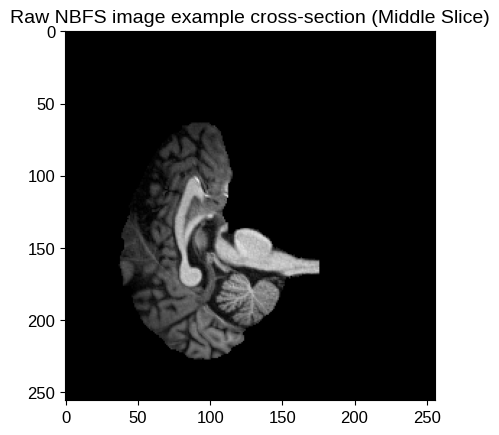

In [ ]:
# Show the middle slice along the 3rd dimension (e.g. z-axis)
plt.imshow(data[:, :, data.shape[2] // 2], cmap='gray')
plt.title('Raw NBFS image example cross-section (Middle Slice)')
save_path = os.path.join(BASE_DIR, "raw_nbfs_cs_eg.pdf")
plt.savefig(save_path, bbox_inches="tight")
#plt.axis('off')
plt.show()

## Display sagittal, coronal and axial axis cross-sections

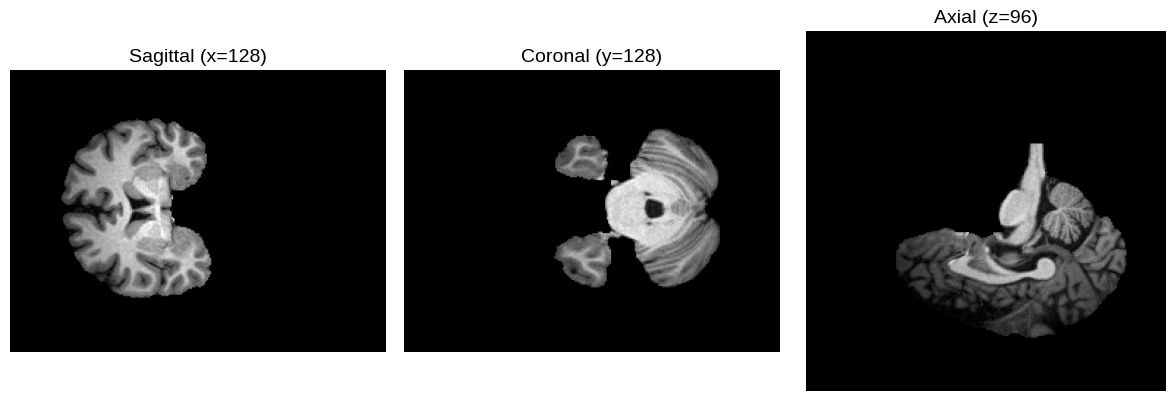

Voxel sizes (mm): (np.float32(1.0), np.float32(1.0), np.float32(0.9999008))
Affine:
 [[ -0.          -0.           0.99990082 -98.19879913]
 [ -1.          -0.          -0.         155.18562317]
 [  0.          -1.           0.          99.04279327]
 [  0.           0.           0.           1.        ]]


In [ ]:
# Middle indices along each axis
ix = data.shape[0] // 2  # sagittal slice index (x-axis)
iy = data.shape[1] // 2  # coronal  slice index (y-axis)
iz = data.shape[2] // 2  # axial    slice index (z-axis)

# Pick slices
sagittal = data[ix, :, :]     # X fixed, view Y-Z
coronal  = data[:, iy, :]     # Y fixed, view X-Z
axial    = data[:, :, iz]     # Z fixed, view X-Y

# Plot with consistent grayscale
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(np.rot90(sagittal), cmap="gray")
axs[0].set_title(f"Sagittal (x={ix})")
axs[0].axis("off")

axs[1].imshow(np.rot90(coronal), cmap="gray")
axs[1].set_title(f"Coronal (y={iy})")
axs[1].axis("off")

axs[2].imshow(np.rot90(axial), cmap="gray")
axs[2].set_title(f"Axial (z={iz})")
axs[2].axis("off")

plt.tight_layout()
save_path = os.path.join(BASE_DIR, "sag_cor_ax_img.pdf")
plt.savefig(save_path, bbox_inches="tight")
plt.show()

# Optional: print voxel sizes (mm) and orientation info
print("Voxel sizes (mm):", img.header.get_zooms()[:3])
print("Affine:\n", img.affine)


## Show an example NFBS image cross-section with mask

In [ ]:
# Load example NFBS file
img = nib.load('/content/drive/MyDrive/Capstone-Project/data/nfbs-data/NFBS_Dataset/A00028185/sub-A00028185_ses-NFB3_T1w_brainmask.nii.gz')

# Get image data as a NumPy array
data = img.get_fdata()

# Check shape and type
print(f"Shape: {data.shape}")
print(f"Data type: {data.dtype}")


Shape: (256, 256, 192)
Data type: float64


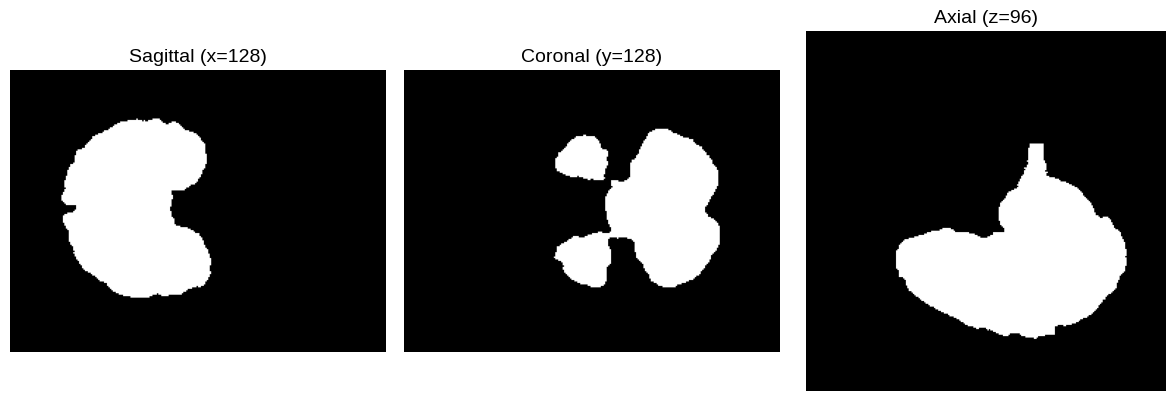

Voxel sizes (mm): (np.float32(1.0), np.float32(1.0), np.float32(0.9999008))
Affine:
 [[ -0.          -0.           0.99990082 -98.19879913]
 [ -1.          -0.          -0.         155.18562317]
 [  0.          -1.           0.          99.04279327]
 [  0.           0.           0.           1.        ]]


In [ ]:
# Middle indices along each axis
ix = data.shape[0] // 2  # sagittal slice index (x-axis)
iy = data.shape[1] // 2  # coronal  slice index (y-axis)
iz = data.shape[2] // 2  # axial    slice index (z-axis)

# Pick slices
sagittal = data[ix, :, :]     # X fixed, view Y-Z
coronal  = data[:, iy, :]     # Y fixed, view X-Z
axial    = data[:, :, iz]     # Z fixed, view X-Y

# Plot with consistent grayscale
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(np.rot90(sagittal), cmap="gray")
axs[0].set_title(f"Sagittal (x={ix})")
axs[0].axis("off")

axs[1].imshow(np.rot90(coronal), cmap="gray")
axs[1].set_title(f"Coronal (y={iy})")
axs[1].axis("off")

axs[2].imshow(np.rot90(axial), cmap="gray")
axs[2].set_title(f"Axial (z={iz})")
axs[2].axis("off")

plt.tight_layout()
save_path = os.path.join(BASE_DIR, "sag_cor_ax_mask.pdf")
plt.savefig(save_path, bbox_inches="tight")
plt.show()

# Optional: print voxel sizes (mm) and orientation info
print("Voxel sizes (mm):", img.header.get_zooms()[:3])
print("Affine:\n", img.affine)


## Observe every slice on one 3D image

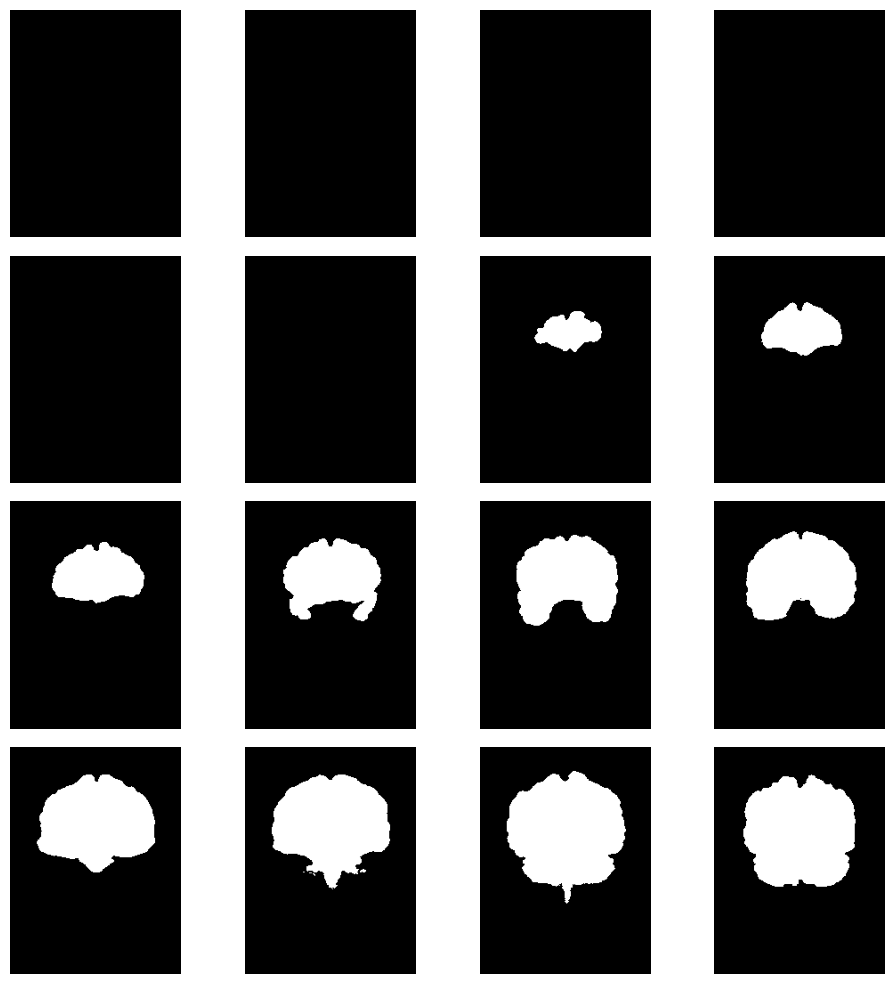

In [ ]:
brain_vol_data=data

fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[2]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)


fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(brain_vol_data[img], cmap='bone')
    axs.flat[idx].axis('off')

plt.tight_layout()
save_path = os.path.join(BASE_DIR, "3d_every_slice.pdf")
plt.savefig(save_path, bbox_inches="tight")
plt.show()

## Standardizing and Normalizing Masked image

In [ ]:
def standardization_norm(image_intensities):
  '''
  Returns a 3D array of z-score normalized intensities

    Parameters:
      image_intensities (np.array): 3D array of image intensities

    Returns:
      vals (np.array): 3D array of normalized intensities
  '''
  mean = np.mean(image_intensities)
  std = np.std(image_intensities)

  assert std > 0, "Image is blank"
  vals = (image_intensities - mean) / std

  return vals


def standardization_0_1(image_intensities):
  '''
  Returns a 3D array of standardized 0 to 1 values

    Parameters:
      image_intensities (np.array): 3D array of image intensities

    Returns:
      vals (np.array): 3D array of standardized intensities
  '''
  minimum = np.min(image_intensities)
  maximum = np.max(image_intensities)

  vals = (image_intensities - minimum) / (maximum - minimum)

  return vals

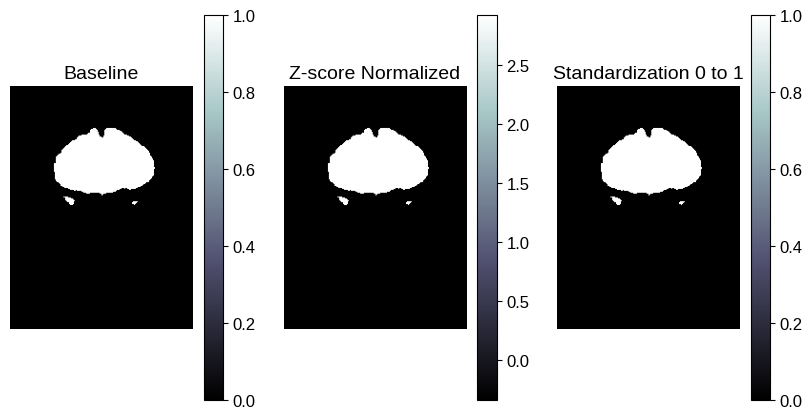

In [ ]:
brain_vol_data=data

norm_brain_vol_data = standardization_norm(brain_vol_data)
stand_0_1_brain_vol_data = standardization_0_1(brain_vol_data)

fig, ax = plt.subplots(1,3, figsize=(10,5))
[axi.set_axis_off() for axi in ax.ravel()] # turn off axes

img1 = ax[0].imshow(brain_vol_data[100], cmap='bone')
ax[0].set_title('Baseline')
fig.colorbar(img1, ax=ax[0])

img2 = ax[1].imshow(norm_brain_vol_data[100], cmap='bone')
ax[1].set_title('Z-score Normalized')
fig.colorbar(img2, ax=ax[1])

img3 = ax[2].imshow(stand_0_1_brain_vol_data[100], cmap='bone')
ax[2].set_title('Standardization 0 to 1')
fig.colorbar(img3, ax=ax[2])

plt.show()